# TP1 Traitement Automatique de la parole

> Répondez aux questions du notebook (dans les cadres CODE et TEXTE). Soyez le plus précis possible et soignez le code.
> Sauvegardez le notebook et ensuite téléchargez le code .ipynb Déposez ce fichier et d'éventuels enregistrements .wav sur la zone de dépot du moodle.

**NOM** : El harty

**Prénom** : Moadh

**Email** : moadh_el.harty_@hotmail.com

# Initialisation de l'environnement de TP




In [1]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal
import numpy as np
from IPython.display import Audio

Utilisez la fonction scipy.io.wavfile.read pour charger le signal [Loc1V1.wav](https://www.irit.fr/~Jerome.Farinas/N73EN/res/Loc1V1.wav) (localisé ici : tp-3en-n7/signaux/Loc1V1.wav). Renseignez- vous sur l’utilisation de cette fonction en regardant la doumentation en ligne de scipy.io.
**Quelle est la fréquence d’échantillonage de ce fichier ? Est-ce bien en 16 KHz ?**

In [2]:

(fe,signal) = scipy.io.wavfile.read('signaux/Loc1V1.wav')
print(fe)

16000


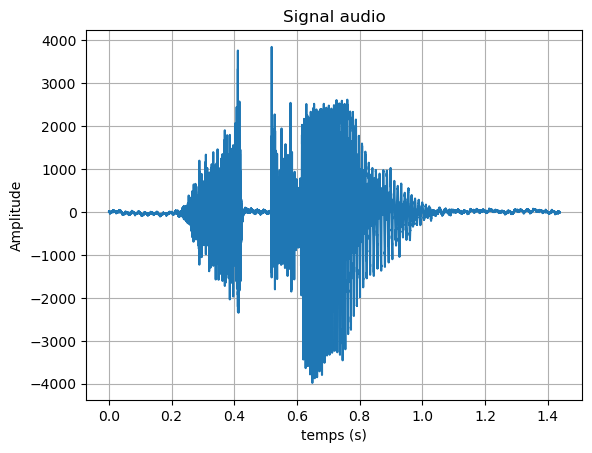

In [3]:
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(signal))/fe,signal)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

In [4]:
# lecture du fichier
Audio(data=signal, rate=fe)

***Affichage d'une partie des échantillons... (entre 9650 et 9700 par exemple)***

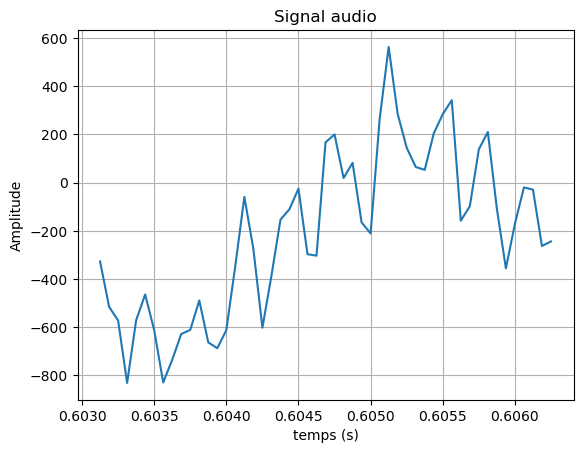

In [5]:
# Affichage des échantillons entre 9650 et 9700
# Affichage du signal
plt.figure(1)
plt.plot((np.arange(len(signal[9650:9701]))+9650)/fe,signal[9650:9701])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

Affichage du spectrogramme  :

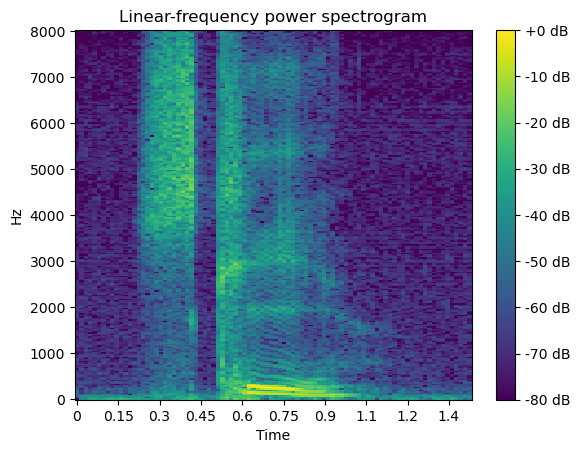

In [56]:
import librosa
import librosa.display
d, sr = librosa.load('signaux/Loc1V1.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

La lecture d'un enregistrement à 16 KHz forcée à 8 KHz va donner ceci :

In [7]:
Audio(data=signal, rate=fe/2)

Et la lecture au double de la fréquence ceci :

In [8]:
Audio(data=signal, rate=fe*2)

Q : ***Qu'obversez vous au niveau des fréquences ? Est-ce normal ?***

Votre réponse : Lorsque la fréquence d'échantillonnage est divisée par 2 (fe/2), on observe une réduction de la bande passante du signal audio, ce qui entraîne une perte de certaines hautes fréquences et un ralentissement au niveau temporel. En revanche, lorsque la fréquence d'échantillonnage est multipliée par 2 (fe*2), on peut observer une augmentation de la bande passante,ce qui rajoute des hautes fréquences et accélère le signal.

Q : ***Conformément au théorème de Shannon, une fréquence échantillonnage de 16kHz est-elle adaptée à la numérisation de la parole ? Appuyez vous sur les valeurs théoriques de l’étendue du spectre de la parole.***

Votre réponse : Oui, la fréquence d'échantillonnage de 16 kHz est généralement considérée comme adaptée à la numérisation de la parole, conformément au théorème de Shannon qui recommande que la fréquence d'échantillonnage soit au moins deux fois la plus haute fréquence du signal. La plage de fréquence de la parole humaine se situe généralement entre 0 et 4 kHz, donc un échantillonnage à 16 kHz est suffisant pour capturer toutes les informations nécessaires.

Q : ***Qu’est ce qu’un phonème ? Combien de phonèmes apparaissent dans le signal Loc1V1 ? Isolez-les dans des variables séparées.***

Votre réponse: Un phonème est l'unité de base distinctive des sons dans une langue donnée qui peut différencier les significations des mots. Ici il y a 3 phénomènes, le "s", le "k" et le "i".

Transcription du signal : ski


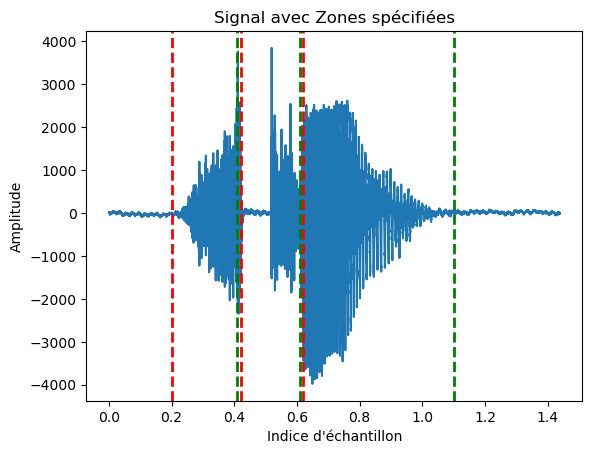

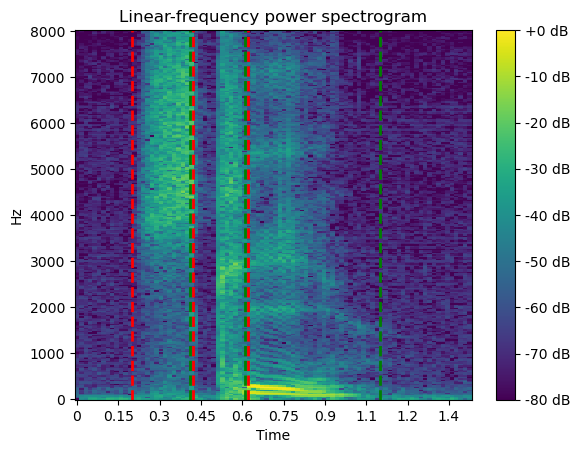

In [57]:
import speech_recognition as sr

def transcrire_signal(audio_path):
    recognizer = sr.Recognizer()

    with sr.AudioFile(audio_path) as source:
        audio_data = recognizer.record(source)
    try:
        transcription = recognizer.recognize_google(audio_data, language="fr-FR")
        return transcription
    except sr.UnknownValueError:
        print("Impossible de transcrire l'audio")
        return None
    except sr.RequestError as e:
        print(f"Erreur lors de la requête à l'API Google : {e}")
        return None

chemin_audio = 'signaux/Loc1V1.wav'
resultat_transcription = transcrire_signal(chemin_audio)

if resultat_transcription:
    print(f"Transcription du signal : {resultat_transcription}")

zones = [(0.2, 0.41), (0.42, 0.61), (0.62, 1.1)]
plt.figure(1)
plt.plot(np.arange(len(signal))/fe,signal)
for zone in zones:
    plt.axvline(x=zone[0], color='r', linestyle='--', linewidth=2)  
    plt.axvline(x=zone[1], color='g', linestyle='--', linewidth=2)  

plt.title('Signal avec Zones spécifiées')
plt.xlabel('Indice d\'échantillon')
plt.ylabel('Amplitude')
plt.figure(2)
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
for zone in zones:
    plt.axvline(x=zone[0], color='r', linestyle='--', linewidth=2)  
    plt.axvline(x=zone[1], color='g', linestyle='--', linewidth=2)  

plt.title('Linear-frequency power spectrogram')
plt.show()


Q : ***Quelle est la différence entre un son voisé et un son non-voisé ?***

Votre réponse : La différence entre un son voisé et un son non-voisé réside dans la vibration des cordes vocales lors de la production du son.

Son voisé : Les cordes vocales vibrent pendant la production du son, créant une sensation de résonance dans la gorge.

Son non-voisé : Les cordes vocales ne vibrent pas pendant la production du son, et il n'y a pas de sensation de résonance dans la gorge.

***Isolez dans des variables séparées une fenetre de 512 points de signal voisé et une autre avec du signal non voisé. Affichez les fenêtres.***

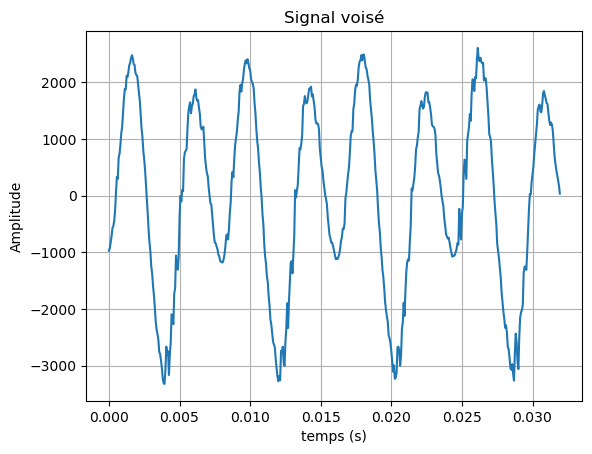

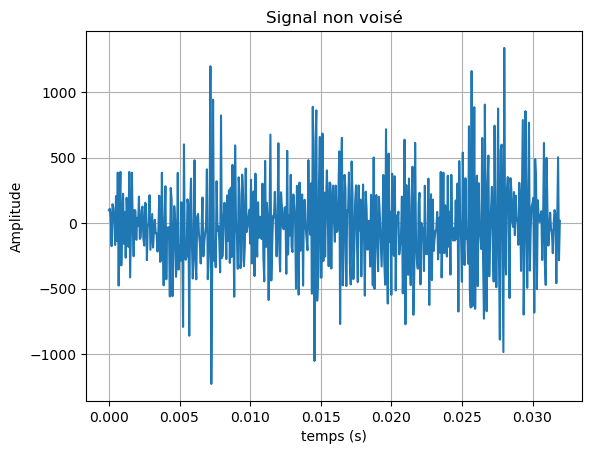

In [45]:
import numpy as np
import matplotlib.pyplot as plt

signal_voise=signal[11200:11712]
signal_non_voise=signal[4500:5012]

plt.figure(1)
plt.plot(np.arange(512)/fe,signal_voise)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal voisé')
plt.grid(True)
plt.figure(2)
plt.plot(np.arange(512)/fe,signal_non_voise)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal non voisé')
plt.grid(True)
plt.show()

***Observez maintenant le signal Loc1V1 entre les échantillons 9650 et 17500. Vous observez alors un unique phonème. Celui-ci peut être séparé en trois zones. Proposez un découpage et justifiez votre choix en faisant le lien avec le système de production de la parole.***

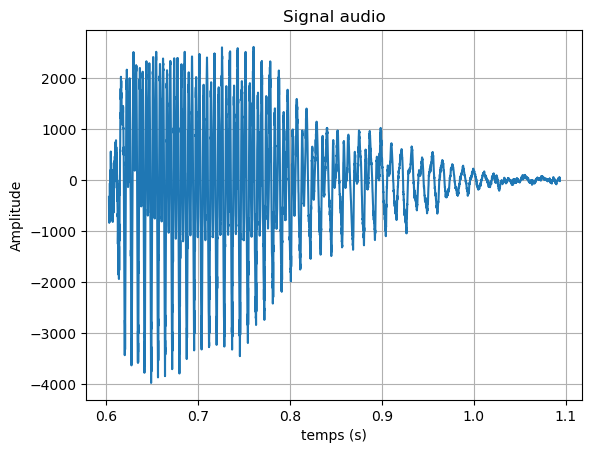

In [17]:
plt.plot((np.arange(len(signal[9650:17501]))+9650)/fe,signal[9650:17501])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

Votre réponse : On constate trois zone séparable avec la valeur du gain. On a trois plateau de gain, entre 0.6 et 0.75, entre 0.82 et 0.9 et entre 1 et 1.1 et 2 atténutions, entre 0.75 et 0.82 et entre 0.9 et 1. Les trois étapes correspondent respectivements à la libération de la parole, à la transition vers l'occlusion et l'occlusion.

***Le même mot est prononcé une nouvelle fois par le même locuteur : Loc1V2.wav. Affichez les signaux, écoutez les, et observerez les différences existantes entre ces deux réalisations.***

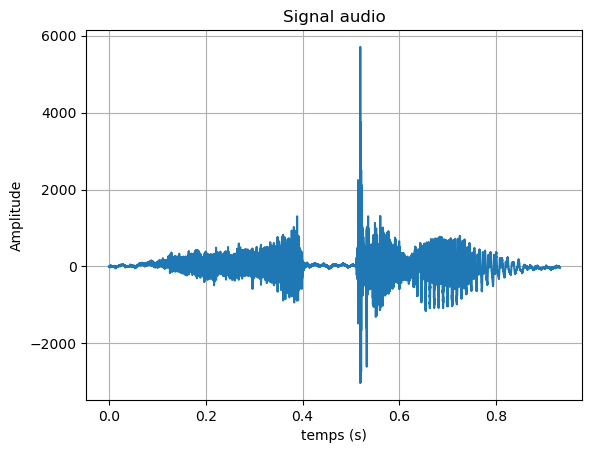

In [23]:
(fe1,signal1) = scipy.io.wavfile.read('signaux/Loc1V2.wav')
plt.plot(np.arange(len(signal1))/fe1,signal1)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
Audio(data=signal1, rate=fe1)

***Comparez ensuite les réalisation du même mot par deux locuteurs différents (fichiers Loc1V1 et Loc2V1). Discutez les causes possibles des différences observées entre deux réalisations.***

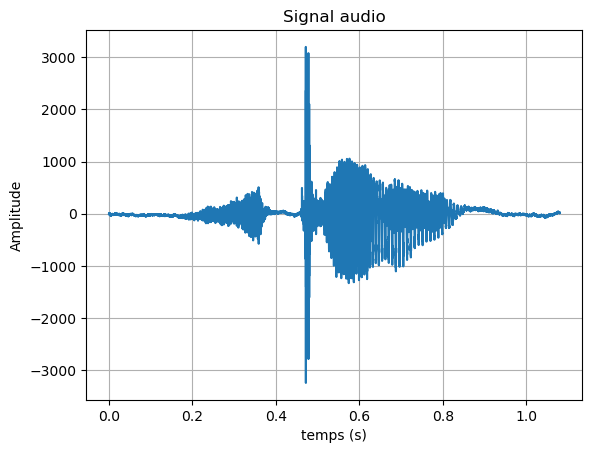

In [22]:
(fe2,signal2) = scipy.io.wavfile.read('signaux/Loc2V1.wav')
plt.plot(np.arange(len(signal2))/fe2,signal2)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
Audio(data=signal2, rate=fe2)

La bouche était surement plus fermée chez le deuxième locuteur ce qui donne un gain plus petit lors de la prononciation du "s" et du "i"

***Enregistrez votre propre voix (vous pouvez utiliser le programme wavsurfer). Utilisez par exemple cette phrase : "Le public est ému par Debussy". Affichez le signal, le spectrogramme et repérez les différents phonèmes qui composent votre production. Comparez avec ce qui a été fait en cours.***

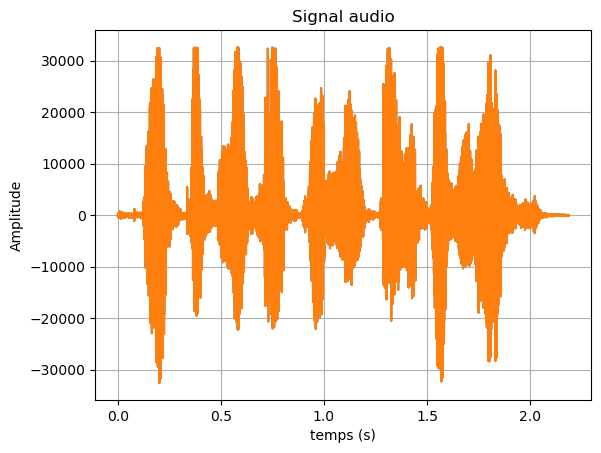

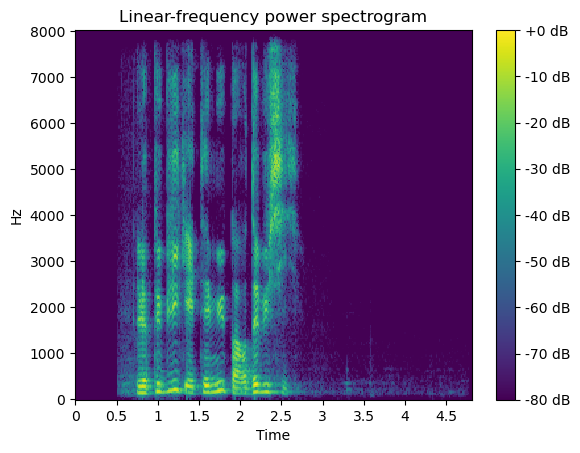

In [49]:
(fe3,signal3) = scipy.io.wavfile.read('signaux/moadh.wav')
plt.figure(1)
plt.plot(np.arange(len(signal3[30000:135000]))/fe3,signal3[30000:135000])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
plt.figure(2)
d, sr = librosa.load('signaux/moadh.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()


***Concluez sur cette partie en prenant en considération le nombre important de causes extérieures de la variabilité temporelle du signal de parole. Ces phénomènes limitent les possibilités d’une analyse plus poussée dans le domaine temporel dans lequel le signal de parole se comporte comme un signal aléatoire.***

Le signal se trouve entre 0.5 seconde et 2.5 seconde. Dans cette zone, on observe bien l'alternance entre voyelles et consonnes comme ce qui a été présenté en cours.

Une petite varition de la cause (une légère fermeture de la bouche) peut entraîner des modifications significatives sur la forme du signal. Cela rend évident compliqué la généralisation de la reconnaissance vocale. Mais, une approche qui s'appuie sur les spectrogrammes des signaux pourrait résoudre cette part d'aléatoire intrinsèque au signal sonore de la voix. 